In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import  yfinance as yf

In [29]:

start = '2010-01-01'
end = '2024-08-31'

df = pd.DataFrame(yf.download('TATASTEEL.NS', start=start, end=end))

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,59.260220,60.641685,58.774323,60.379684,19.329817,58460615
2010-01-05,60.836998,62.385197,60.836998,61.842136,19.798002,81889733
2010-01-06,62.880619,62.880619,60.689323,61.170456,19.582973,77150753
2010-01-07,61.441986,62.194649,60.984673,61.908825,19.819353,80144960
2010-01-08,62.023155,63.023529,61.060890,61.780209,19.778179,86063510


In [30]:
df=df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3612,2024-08-26,154.610001,156.399994,153.699997,155.699997,155.699997,32497603
3613,2024-08-27,155.800003,156.500000,154.600006,154.699997,154.699997,24523684
3614,2024-08-28,154.699997,155.000000,153.050003,153.699997,153.699997,25195197
3615,2024-08-29,153.210007,153.559998,151.199997,152.970001,152.970001,44452983
3616,2024-08-30,153.000000,155.250000,152.470001,152.759995,152.759995,55134023


In [31]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,59.260220,60.641685,58.774323,60.379684,58460615
1,60.836998,62.385197,60.836998,61.842136,81889733
2,62.880619,62.880619,60.689323,61.170456,77150753
3,61.441986,62.194649,60.984673,61.908825,80144960
4,62.023155,63.023529,61.060890,61.780209,86063510


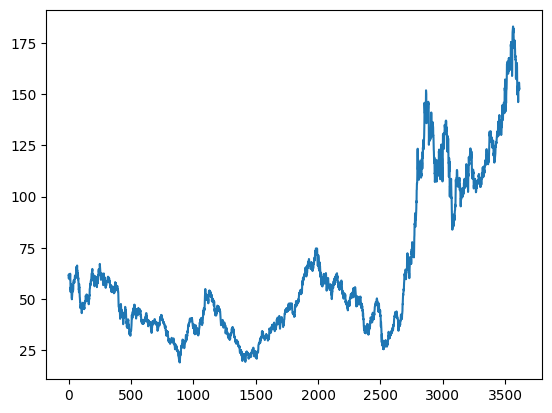

In [32]:
plt.plot(df.Close)

In [33]:
ma100=df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3612,166.0381
3613,166.0266
3614,165.9321
3615,165.8153


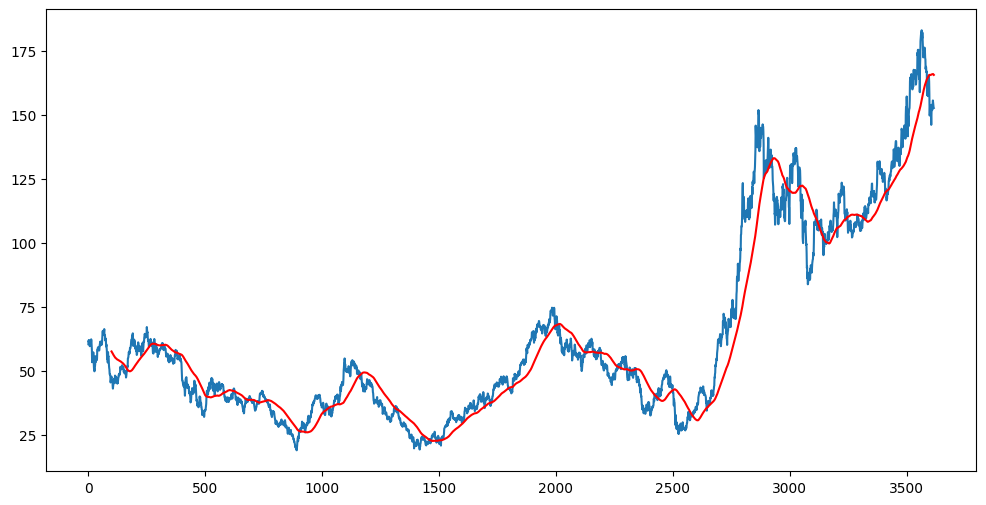

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df. Close)
plt.plot(ma100, 'r')

In [35]:
ma200=df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3612,150.94955
3613,151.12930
3614,151.31480
3615,151.48915


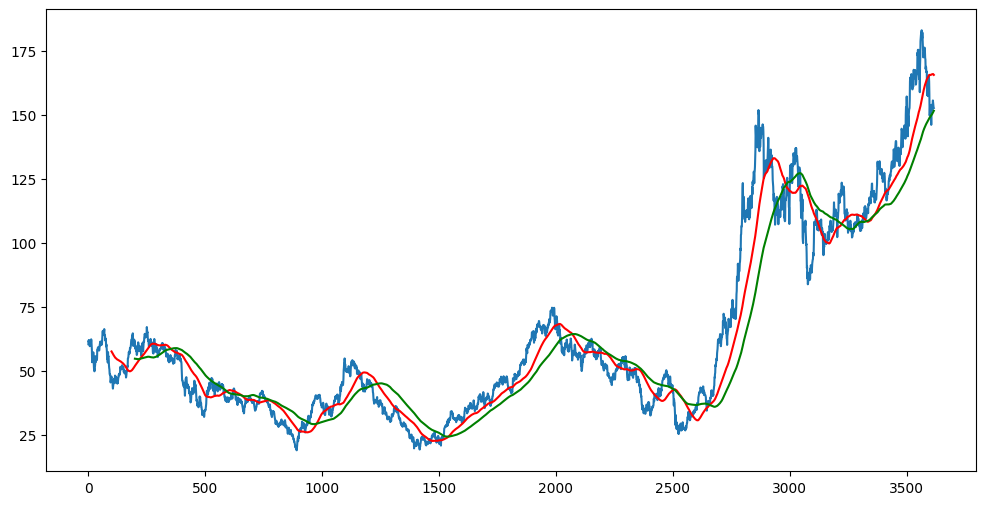

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df. Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [37]:

data_training=pd.DataFrame(df['Close'][0: int(len(df)*0.78)])
data_testing = pd.DataFrame(df[ 'Close'][int(len(df)*0.70): int(len(df))])
#basically doing a 70 30 split here
# we will fcus only on Close column
print(data_training.shape)
print(data_testing.shape)

(2821, 1)
(1086, 1)


In [38]:
#for  giving input to lstm we have to scale down data btwn 0 and 1 so we will use mon max scaler for that
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.397042  ],
       [0.41103649],
       [0.40460905],
       ...,
       [0.8824903 ],
       [0.87282539],
       [0.88569597]])

In [67]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
#we start from 100 because we need i-100 points for x train

In [68]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [69]:
model=Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout (0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add (Dropout (0.5))

model.add(Dense(units=1)) # only 1 unit in dense bcuz be have to predict only i value(closing price)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - loss: 0.0016
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - loss: 0.0012
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 0.0012
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - loss: 0.0013
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - loss: 0.0016
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - loss: 0.0012
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 0.0011
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - loss: 0.0012
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0014
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - loss: 0.0014
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 0.0013
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0014
Epoch 13/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 309ms/step - loss: 0.0013
Epoch 14/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - loss: 0.0011
Epoch 15/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [74]:
model.save('keras_model.h5')

In [75]:
past_100_days=data_training.tail(100)

In [76]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [77]:
final_df.head() #this will be our testing data input

,Close
0,70.915001
1,70.635002
2,70.589996
3,66.669998
4,68.110001


In [78]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.28309542],
       [0.28130692],
       [0.28101944],
       ...,
       [0.81188721],
       [0.80722434],
       [0.80588291]])

In [88]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [89]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test. shape)

(1086, 100, 1)
(1086,)


In [90]:
y_predicted=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


In [91]:
y_predicted.shape

(1086, 1)

In [92]:
y_test

array([0.01226406, 0.01465939, 0.01750184, ..., 0.81188721, 0.80722434,
       0.80588291])

In [93]:
y_predicted

array([[0.57187706],
       [0.5503426 ],
       [0.49872357],
       ...,
       [0.8736893 ],
       [0.8744034 ],
       [0.87307394]], dtype=float32)

In [94]:
scaler.scale_

array([0.00638753])

In [95]:
scale_factor = 1/0.00638753
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

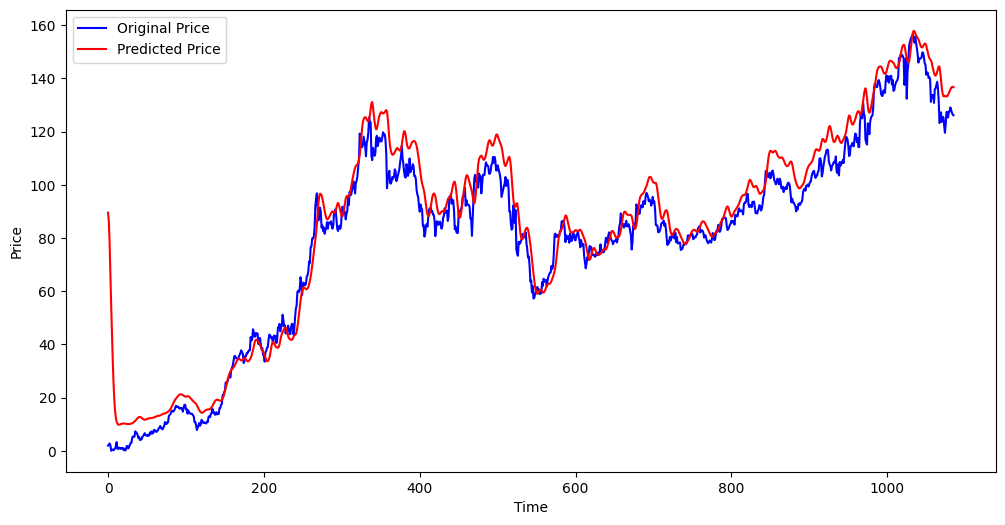

In [96]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel("Price")
plt.legend()
plt.show()